# 模型训练过程分析

## 引入第三方包

In [1]:
import glob
import pickle

import numpy as np
import matplotlib.pyplot as plt

## 加载训练过程记录

In [2]:
history_file = './pre-trained/history/optimizer/binary_ce/captcha_adam_binary_crossentropy_bs_100_epochs_100.history'
with open(history_file, 'rb') as f:
    history = pickle.load(f)

## 训练过程可视化

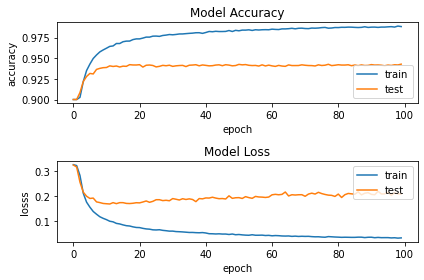

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

## 定义过程可视化方法

In [5]:
def plot_training(history=None, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    for key, val in history.items():
        model_list.append(key.replace(HISTORY_DIR, '').rstrip('.history'))
        plt.plot(val[metric])

    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

## 加载预训练模型记录

In [10]:
HISTORY_DIR = './pre-trained/history/optimizer/binary_ce/'
history = {}
for filename in glob.glob(HISTORY_DIR + '*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

In [14]:
for key, val in history.items():
    print(key.replace(HISTORY_DIR, '').rstrip('.history'), val.keys())

## 准确率变化（训练集）

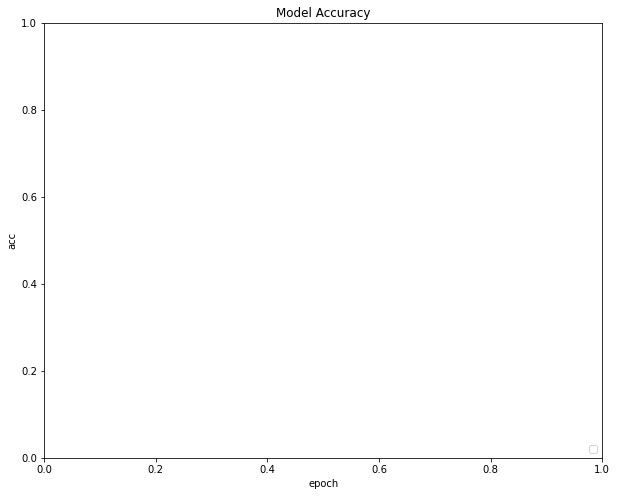

In [15]:
plot_training(history)

## 损失值变化（训练集）

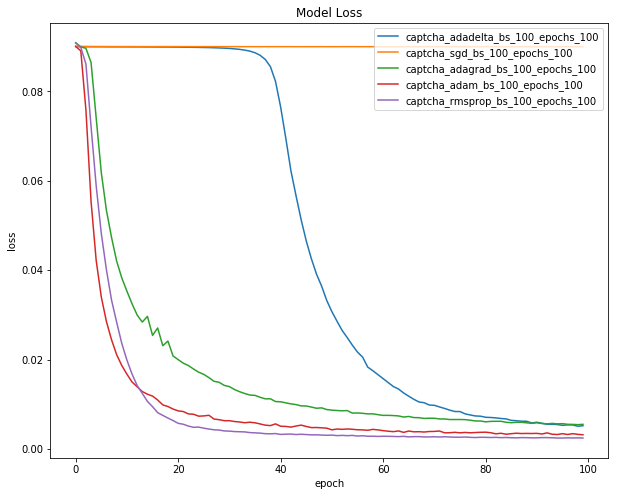

In [10]:
plot_training(history, metric='loss', title='Model Loss', loc='upper right')

## 准确率变化（测试集）

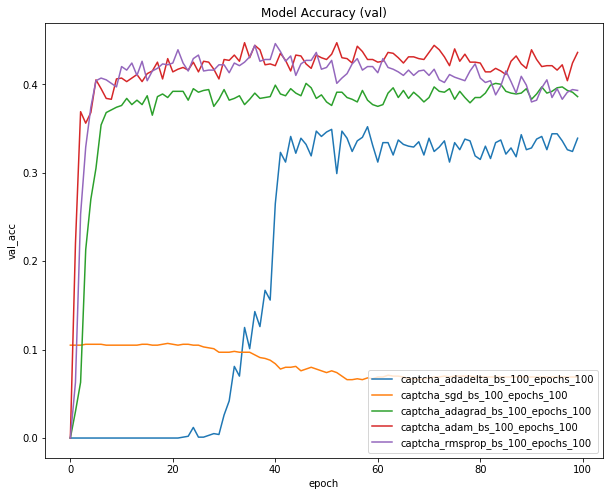

In [11]:
plot_training(history, metric='val_acc', title='Model Accuracy (val)')

## 损失值变化（测试集）

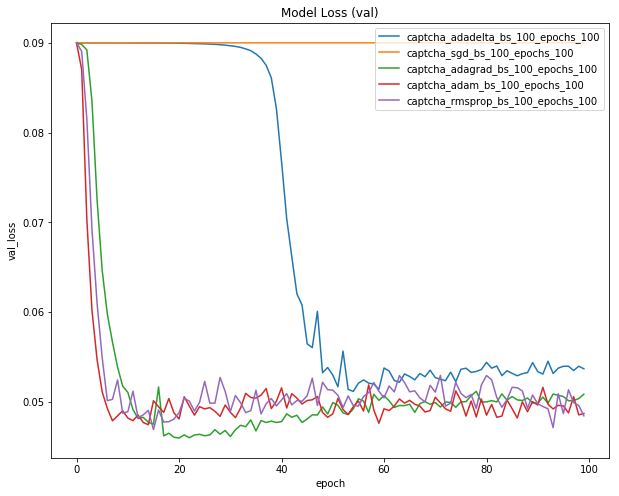

In [12]:
plot_training(history, metric='val_loss', title='Model Loss (val)', loc='upper right')